In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
train_images = train_images / 255.0

In [30]:
test_images = test_images / 255.0

In [31]:
from keras.layers import Input, Flatten

model = keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.7864 - loss: 0.6221


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8493 - loss: 0.4260


In [35]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8431000113487244


In [36]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [37]:
predicted_labels = np.argmax(predictions, axis=1)

In [38]:
num_rows = 5
num_cols = 5

In [40]:
num_images = num_rows * num_cols 
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows)) 

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

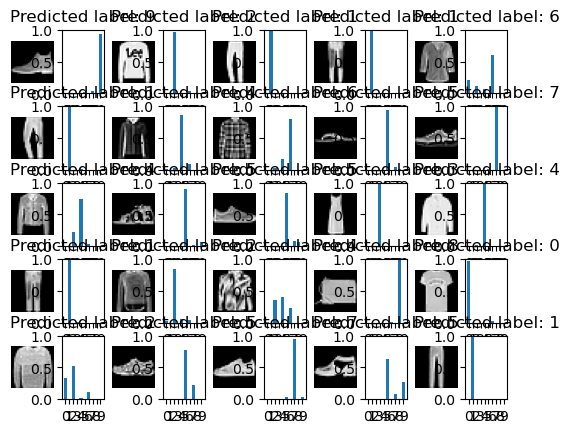

In [41]:
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f"Predicted label: {predicted_labels[i]}")


In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>